In [71]:
import time
import datetime
import sys
import databricks.koalas as ks
from pyspark.sql import SparkSession

In [72]:
%%javascript
(function(on) {
    const e = $("<a>Setup failed</a>");
    const ns = "js_jupyter_suppress_warnings";
    var cssrules = $("#" + ns);
    if(!cssrules.length)
        cssrules = $("<style id='" + ns + "' type='text/css'>div.output_stderr { } </style>").appendTo("head");
    e.click(function() {
        var s = 'Showing';
        cssrules.empty()
        if(on) {
            s = 'Hiding';
            cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
        }
        e.text(s + ' warnings (click to toggle)');
        on = !on;
    }).click();
    $(element).append(e);
})(true);

<IPython.core.display.Javascript object>

In [73]:
prev = datetime.datetime.now()
description = ks.read_csv("Course_info.csv")
now = datetime.datetime.now()
print(now - prev)

0:00:00.325730


In [74]:
prev = datetime.datetime.now()
comments = ks.read_csv("Comments.csv")
now = datetime.datetime.now()
print(now - prev)

0:00:02.499003


In [75]:
description.head()

23/01/02 04:20:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.0,"""Debunking Myths of Entrepreneurship A startup...",26474.0,4.5,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,None,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.4,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.8,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,None,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [76]:
description.describe()

,id,content_length_min
count,2.097340e+05,209733.000000
mean,3.015403e+06,265.409569
std,1.342558e+06,461.272831
min,1.769000e+03,0.000000
25%,1.950382e+06,68.000000
50%,3.292810e+06,133.000000
75%,4.189386e+06,289.000000
max,4.914146e+06,36899.000000


In [77]:
description.info()

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1356: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/pyspark/sql/pandas/conversion.py:486: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



23/01/02 04:20:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
<class 'databricks.koalas.frame.DataFrame'>
Int64Index: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid           

In [78]:
# change the dataframe data type
prev = datetime.datetime.now()
description['num_subscribers'] = description['num_subscribers'].astype('int64')
description['num_reviews'] = description['num_reviews'].astype('int64')
description['num_comments'] = description['num_comments'].astype('int64')
description['num_lectures'] = description['num_lectures'].astype('int64')
description['num_reviews'] = description['num_reviews'].astype('int64')
now = datetime.datetime.now()
print(now - prev)

0:00:00.236774


In [79]:
import pyspark.pandas as ps

In [80]:
description.info()

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1356: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/pyspark/sql/pandas/conversion.py:486: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



23/01/02 04:20:20 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:20 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:20 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:20 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
<class 'databricks.koalas.frame.DataFrame'>
Int64Index: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid           

In [81]:
def get_instructor_username(instructor_url):
	return str(instructor_url)[6:-2]

In [82]:
description['instructor_url'] = description['instructor_url'].map(get_instructor_username)

23/01/02 04:20:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1356: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/pyspark/sql/pandas/conversion.py:486: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/pyspark/sql/pandas/functions.py:394: UserWarning:

In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecate

In [83]:
def get_curse_name(course_url):
	return str(course_url)[8:-1]

In [84]:
description['course_url'] = description['course_url'].map(get_curse_name)

23/01/02 04:20:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1356: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/pyspark/sql/pandas/conversion.py:486: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/pyspark/sql/pandas/functions.py:394: UserWarning:

In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecate

In [85]:
description.rename(columns={'instructor_url':'instructor_username'},inplace=True)

In [86]:
description.rename(columns={'course_url':'course_name'},inplace=True)

In [87]:
english_dataframe = description[description['language'] == 'English']

In [88]:
english_dataframe.info()

23/01/02 04:20:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

23/01/02 04:20:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
<class 'databricks.koalas.frame.DataFrame'>
Int64Index: 123758 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   123758 non-null  float64
 1   title                123758 non-null  object 
 2   is_paid       

In [89]:
instructors_df = english_dataframe.groupby(['instructor_username','instructor_name']).agg({'num_subscribers':'mean','avg_rating':'mean','price':'mean'})



In [90]:
instructors_df.reset_index(inplace=True)

In [91]:
instructors_df = instructors_df.rename(columns={'instructor_username':'username','instructor_name':'name','num_subscribers':'avg_num_subscribers','price':'avg_price'})

In [92]:
def getFirstName(name):
	if name is None:
		return "None"
	sname = name.split()
	prefix = ['mr.','mrs.','ms.','dr.','prof.','sr.','jr.','.',',','mr','mrs','ms','dr','prof','sr','jr']
	for i in range(len(sname)):
		sname[i] = sname[i].lower()
	if len(sname) > 0 and sname[0] not in prefix:
		return sname[0]
	elif len(sname) > 1 and sname[1] not in prefix:
		return sname[1]
	elif len(sname) > 2 and sname[2] not in prefix:
		return sname[2]

In [93]:
instructors_df['name']= instructors_df['name'].map(getFirstName)

23/01/02 04:20:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 0

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

23/01/02 04:20:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1356: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/pyspark/sql/pandas/conversion.py:486: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/pyspark/sql/pandas/functions.py:394: UserWarning:

In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecate

In [94]:
instructors_df.head()

23/01/02 04:20:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 0

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

23/01/02 04:20:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():


,username,name,avg_num_subscribers,avg_rating,avg_price
0,carolinejenkins,caroline,911.0,4.150000,49.99
1,jeremyschoemake,jeremy,16130.0,3.450000,27.49
2,markbailey,mark,193.0,4.825000,134.99
3,katyaseberso,katya,4855.0,4.372597,199.99
4,isabelkumer,kumerz,972.0,4.800000,129.99


In [95]:
import gender_guesser.detector as gender
gd = gender.Detector()

In [96]:
instructors_df['gender'] = instructors_df['name'].map(lambda x: gd.get_gender(x.capitalize()))

23/01/02 04:20:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 0

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

23/01/02 04:20:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning:

iteritems is depreca

In [97]:
instructors_df.head()

23/01/02 04:20:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 0

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

23/01/02 04:20:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

,username,name,avg_num_subscribers,avg_rating,avg_price,gender
0,carolinejenkins,caroline,911.0,4.150000,49.99,female
1,jeremyschoemake,jeremy,16130.0,3.450000,27.49,male
2,markbailey,mark,193.0,4.825000,134.99,male
3,katyaseberso,katya,4855.0,4.372597,199.99,female
4,isabelkumer,kumerz,972.0,4.800000,129.99,unknown


In [98]:
unk_instructors = instructors_df[instructors_df['gender'] == 'unknown']

In [99]:
unk_instructors.describe()

23/01/02 04:20:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 0

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

23/01/02 04:20:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

,avg_num_subscribers,avg_rating,avg_price
count,13586.000000,13586.000000,13586.000000
mean,2789.077010,3.558307,62.988251
std,9472.286815,1.490966,119.943831
min,0.000000,0.000000,0.000000
25%,27.000000,3.425000,19.990000
50%,306.000000,4.137412,24.990000
75%,1871.333333,4.500000,64.990000
max,294159.000000,5.000000,999.000000


In [100]:
prev = datetime.datetime.now()
# get all the unique names
gbyname = unk_instructors.groupby('name').agg({'name':'count'})
gbyname.rename(columns={'name':'count'},inplace=True)
gbyname.describe()
now = datetime.datetime.now()
print(now - prev)

23/01/02 04:20:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 0

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

23/01/02 04:20:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

0:00:01.462413


In [101]:
gbyname = gbyname.sort_values(by='count',ascending=False)

In [102]:
# se tendria que hacer una labor de identificarlos a mano o encontrar un diccionario en linea que contenga nombres de indios
gbyname.head()

23/01/02 04:20:29 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:29 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:29 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:29 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:29 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:29 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 0

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

23/01/02 04:20:30 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:30 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:30 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:30 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

,count
name,
abhishek,55
gaurav,40
learn,37
tech,36
md,33


In [103]:
known_instructors = instructors_df[instructors_df['gender'] != 'unknown']

In [104]:
known_instructors.describe()

23/01/02 04:20:30 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:30 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:30 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:30 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:30 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:30 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 0

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

23/01/02 04:20:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

,avg_num_subscribers,avg_rating,avg_price
count,29101.000000,29101.000000,29101.000000
mean,2638.031215,3.697273,57.884448
std,10767.451304,1.481033,80.388481
min,0.000000,0.000000,0.000000
25%,28.500000,3.700000,19.990000
50%,264.500000,4.264286,29.990000
75%,1704.500000,4.550971,74.990000
max,601651.000000,5.000000,999.000000


In [105]:
known_instructors.head()



23/01/02 04:20:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 0

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

23/01/02 04:20:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

,username,name,avg_num_subscribers,avg_rating,avg_price,gender
0,carolinejenkins,caroline,911.0,4.150000,49.99,female
1,jeremyschoemake,jeremy,16130.0,3.450000,27.49,male
2,markbailey,mark,193.0,4.825000,134.99,male
3,katyaseberso,katya,4855.0,4.372597,199.99,female
5,aaronnfletche,aaron,2434.0,4.150000,19.99,male


In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt # for importing matplotlib
import plotly.offline as py # for importing plotly
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

In [107]:
# the most succesfull according to sex
avg_num_subscribers_per_gender_ks = known_instructors.groupby('gender').agg({'avg_num_subscribers':'mean'})

In [108]:
avg_num_subscribers_per_gender_ks.reset_index(inplace=True)

In [109]:

avg_num_subscribers_per_gender = avg_num_subscribers_per_gender_ks.to_pandas()

23/01/02 04:20:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 0

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

23/01/02 04:20:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 0

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

23/01/02 04:20:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():


In [110]:
avg_num_subscribers_per_gender.head()

,gender,avg_num_subscribers
0,mostly_female,2054.773661
1,female,1337.588612
2,andy,2169.628408
3,male,3181.537079
4,mostly_male,3083.706504


In [111]:

avg_num_subscribers_per_gender_ks.plot.bar(x='gender',y='avg_num_subscribers',title='Average number of subscribers')

23/01/02 04:20:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 0

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

23/01/02 04:20:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 0

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

23/01/02 04:20:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [112]:
avg_rating_per_gender_ks = known_instructors.groupby('gender').agg({'avg_rating':'mean'})
avg_rating_per_gender = avg_rating_per_gender_ks.to_pandas()

23/01/02 04:20:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 0

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

23/01/02 04:20:36 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:36 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:36 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/02 04:20:36 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():
/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/koalas/venv/lib/python3.8/site-packages/databricks/koalas/internal.py:1430: FutureWarning: iteritems is deprecat

In [113]:
avg_rating_per_gender

,avg_rating
gender,
mostly_female,3.569634
female,3.543443
andy,3.575397
male,3.767375
mostly_male,3.733086


<AxesSubplot: xlabel='gender', ylabel='avg_rating'>

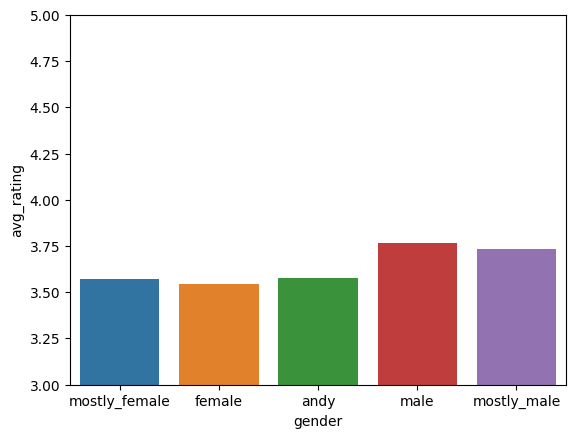

In [114]:
# set the x range to be from 3 to 5
plt.ylim(3,5)
sns.barplot(x = avg_rating_per_gender.index, y = 'avg_rating', data = avg_rating_per_gender)